In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Histogramas

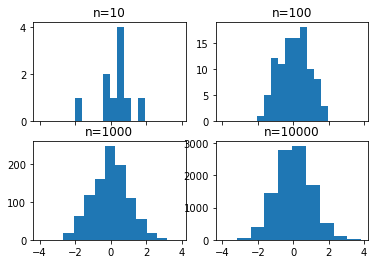

In [4]:
# Extraigamos algunas muestras de la distribución normal y representemos cuatro histogramas diferentes como subparcelas. 
# primero voy a
# crear nuestra cuadrícula de 2 x 2 de objetos de eje. En este caso, no queremos compartir el eje y entre las gráficas ya que
# estamos buscando intencionalmente un número de diferentes tamaños de muestras.
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

# Lo que más nos interesa es la uniformidad de la distribución. Entonces podemos iterar a través de una lista de cuatro
# valores diferentes, 10, 100, 1,000 y 10,000. Y sacaremos muestras del NumPy. Recuerda que lo normal
# La función aleatoria solo crea una lista de números basada en la distribución normal subyacente.

# Vamos a iterar sobre cada eje

for n in range(0, len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title(f'n={sample_size}')


### Definir el numero de bins

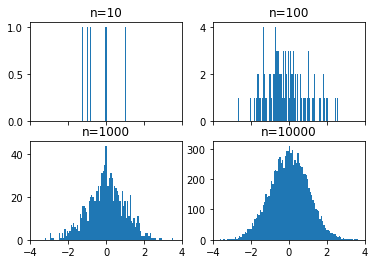

In [5]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    # pull out a number of samples, getting exponentially bigger
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    # and plot that sample
    axs[n].hist(sample, bins=100)
    # setting a useful, of course!
    axs[n].set_title(f'n={sample_size}')

### GridSpec - graficos paralelos

GridSpec le permite mapear ejes sobre múltiples celdas en una cuadrícula.

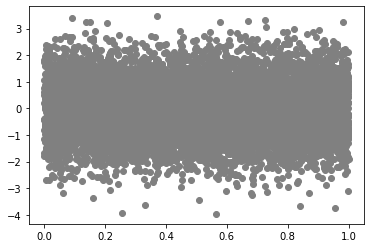

In [7]:
# Vamos a crear dos series de datos
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y, color = "gray")

Al observar este gráfico, no está del todo claro cuáles son las distribuciones reales para cada eje, pero podríamos agregar dos gráficos más pequeños, cada uno de los histogramas, para que esto quede un poco más claro.

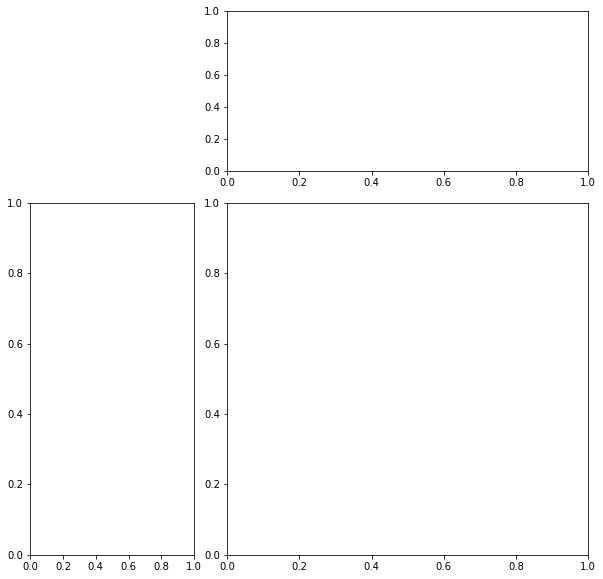

In [9]:
# Para usar GridSpec, primero lo importamos, luego creamos un nuevo GridSpec de la forma general que queremos.
# usar gridspec para dividir la figura en subtramas
import matplotlib.gridspec as gridspec
plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3,3)

# Cuando agregamos nuevos elementos con la subparcela, en lugar de especificar los tres números de fila, columna y posición,
# pasamos los elementos del objeto GridSpec que deseamos cubrir. Y muy importante aquí. Porque
# estamos usando los elementos de una lista, toda la indexación comienza en cero y es muy razonable de usar
# rebanado para el principio o el final de las listas.

# GridSpec se indexa como filas y columnas utilizando el operador de indexación o corchetes. 
# Esto quiere decir, que cada elemento de su grilla, puede ser seleccionado con un indice numerico

# Muy biencrear la primera subparcela y el histograma en la fila 0, cubriendo el primer elemento, la posición media,
# y yendo al final de la fila.
top_histogram = plt.subplot(gspec[0, 1:])

# Crearemos el histograma lateral comenzando en la fila 1 y continuando hasta el final de los elementos de la fila, 
# pero limitado a la columna 0
side_histogram = plt.subplot(gspec[1:, 0])

# Finalmente, crearemos el gráfico de dispersión en la parte inferior derecha. Cuando ejecutamos esto, 
# vemos nuestro conjunto básico de parcelas, genial.
lower_right = plt.subplot(gspec[1:, 1:])

Ahora, completemos esto con algunos datos. Primero el diagrama de dispersión, luego el histograma superior, que es para los valores x, luego el histograma lateral para los valores y

(array([  1.,   0.,   0.,   0.,   0.,   2.,   2.,   4.,   4.,   2.,   2.,
          5.,   2.,   7.,  16.,   9.,  11.,  20.,  22.,  20.,  26.,  39.,
         29.,  40.,  54.,  54.,  54.,  52.,  90.,  83.,  92., 102., 132.,
        114., 155., 152., 157., 156., 198., 221., 219., 203., 243., 227.,
        279., 256., 266., 303., 282., 302., 297., 262., 301., 279., 280.,
        271., 264., 250., 283., 233., 231., 219., 203., 195., 205., 170.,
        161., 138., 135., 109., 103.,  98.,  81.,  86.,  73.,  55.,  56.,
         44.,  31.,  39.,  25.,  19.,  19.,  11.,  16.,  14.,   4.,   8.,
          4.,   2.,   1.,   1.,   3.,   5.,   0.,   2.,   3.,   0.,   0.,
          2.]),
 array([-3.75663755, -3.68323017, -3.60982279, -3.53641542, -3.46300804,
        -3.38960066, -3.31619329, -3.24278591, -3.16937853, -3.09597116,
        -3.02256378, -2.9491564 , -2.87574903, -2.80234165, -2.72893427,
        -2.6555269 , -2.58211952, -2.50871214, -2.43530477, -2.36189739,
        -2.28849002, -2.21

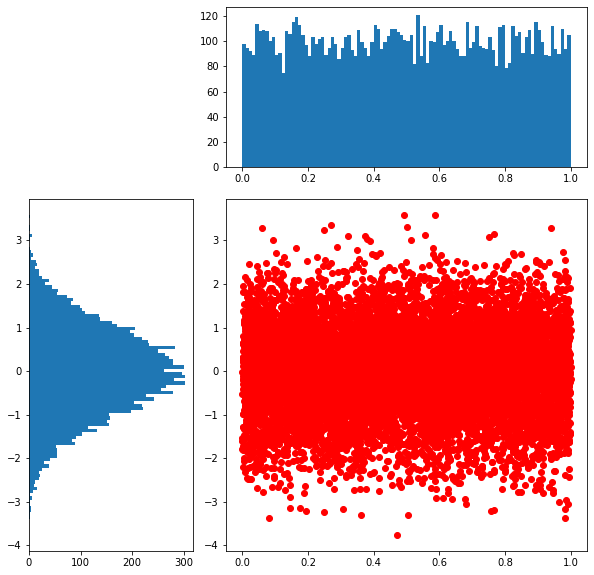

In [11]:
# Our fake data
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

# Our figure and gridspec
plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3, 3)

# Our three subplots all spec'ed out
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

# And now our data plotted in each subplot
lower_right.scatter(X, Y, color = "red")
top_histogram.hist(X, bins=100)
side_histogram.hist(Y, bins=100, orientation='horizontal')

Since these are probability density histograms, we care only about the relative values, and in matplotlib we can do this be indicating that our histograms are **density=True**. We can also **invert the xaxis** subplot for the histogram on the left hand side, which makes is (perhaps) more clear that it represents the data in the right hand side. We do this directly using the **invert_xaxis function on the axis**. Finally, we can see that our axes have a bit of whitespace padding on the left and right which seems unneccessary. So we can get rid of this by changing our axes limits.

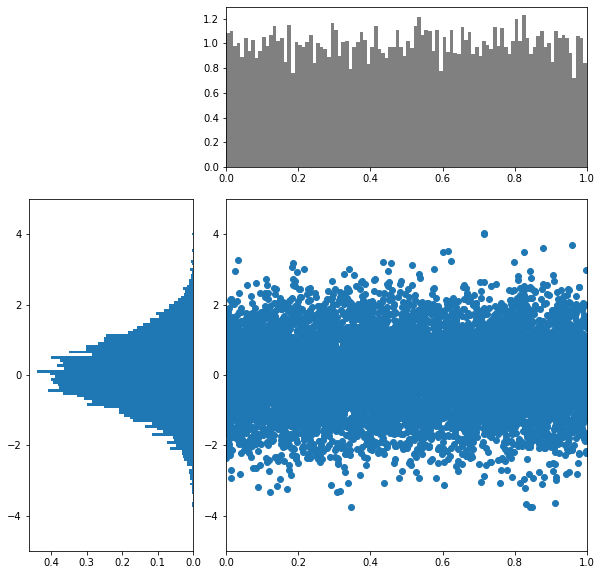

In [13]:
# Our fake data
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

# Our figure and gridspec
plt.figure(figsize=(10,10))
gspec = gridspec.GridSpec(3, 3)

# Our three subplots all spec'ed out
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

# And now our data plotted in each subplot, making it clear this is a density function
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100,  density=True, color='gray')
side_histogram.hist(Y, bins=100, orientation='horizontal',  density=True);

# Flip the side histogram's x axis
side_histogram.invert_xaxis()

# change axes limits to get rid of whitespace
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)